# <center>Самостійна робота №7
## <center>Виконав: студент групи ПБ-21 мп Якобчук Євгеній
## <center>Варіант №5
## <center>Загальні завдання для всіх варіантів 

### 1. Створіть власний набір навчальних зображень для згорткової нейронної мережі. Набір має містити зображення як мінімум трьох різних класів об’єктів. Всі зображення в наборі мають бути розподілені на три підмножини – навчальну, валідаційну та тестову. Підмножини мають розміщуватись у окремих папках.

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image

from tensorflow.keras.applications import VGG16

import matplotlib.pyplot as plt

In [2]:
train_dir = 'E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр7/animals/train'

val_dir = 'E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр7/animals/valid'

test_dir = 'E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр7/animals/test'

classes = os.listdir(train_dir)
print(classes)

['deer', 'elephant', 'frog']


### 2. Завантажте створений набір даних за допомогою генератора. Сформуйте навчальну, валідаційну і тестову множини. Самостійно визначте оптимальний розмір зображень та розмір батчу. У разі необхідності, під час формування навчальної множини використайте аугментацію даних.

In [3]:
img_width, img_height = 200, 200
input_shape = (img_width, img_height, 3)
batch_size = 32

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [5]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 150 images belonging to 3 classes.
Found 54 images belonging to 3 classes.
Found 36 images belonging to 3 classes.


### 3. Перевірте роботу генератора на довільному одному зображенні.

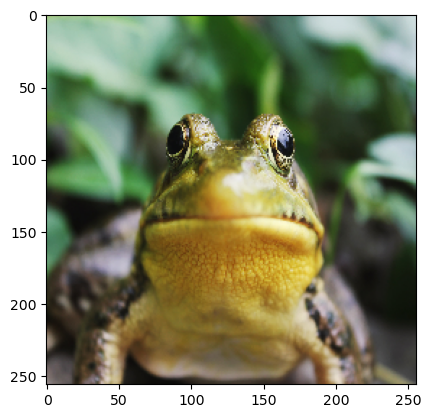

In [6]:
image_file_name = train_dir + '/frog/1.jpg'
img = image.load_img(image_file_name, target_size=(256, 256))
plt.imshow(img)

### 4. Використовуючи підхід transfer learning, створіть та навчіть згорткову нейронну мережу на базі архітектури VGG-16 для розпізнавання класів об’єктів на зображеннях. Побудуйте графік навчання.

In [7]:
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

58892288/58889256 [==============================] - 26s 0us/step


In [8]:
vgg16_net.trainable = False
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [9]:
model = Sequential()
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(classes), activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

In [10]:
nb_train_samples = 150
nb_validation_samples = 54

In [11]:
history = model.fit(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=15,
            validation_data=val_generator,
            validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
4/4 [==============================] - 87s 22s/step - loss: 1.2413 - accuracy: 0.3136 - val_loss: 1.1408 - val_accuracy: 0.3125
Epoch 2/15
4/4 [==============================] - 71s 18s/step - loss: 1.0600 - accuracy: 0.4453 - val_loss: 1.0284 - val_accuracy: 0.4688
Epoch 3/15
4/4 [==============================] - 63s 16s/step - loss: 1.0104 - accuracy: 0.4831 - val_loss: 0.9934 - val_accuracy: 0.5000
Epoch 4/15
4/4 [==============================] - 61s 15s/step - loss: 0.9360 - accuracy: 0.5593 - val_loss: 0.9459 - val_accuracy: 0.6562
Epoch 5/15
4/4 [==============================] - 61s 15s/step - loss: 0.8271 - accuracy: 0.6864 - val_loss: 0.9582 - val_accuracy: 0.5000
Epoch 6/15
4/4 [==============================] - 60s 15s/step - loss: 0.7663 - accuracy: 0.6949 - val_loss: 0.8494 - val_accuracy: 0.7500
Epoch 7/15
4/4 [==============================] - 65s 16s/step - loss: 0.7135 - accuracy: 0.8047 - val_loss: 0.8156 - val_accuracy: 0.6875
Epoch 8/15
4/4 [===========

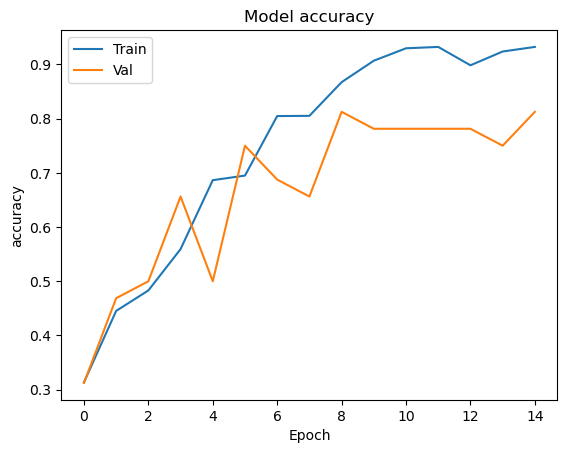

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### 5. Проведіть оцінку якості роботи навченої мережі на тестових даних.

In [13]:
scores = model.evaluate(test_generator)
print(f"Accuracy на тестових даних: {(scores[1]*100):.2f}")

2/2 [==============================] - 1s 350ms/step - loss: 0.4938 - accuracy: 0.9167
Accuracy на тестових даних: 91.67


### 6. Спробуйте максимально покращити якість створеної нейронної мережі, використавши тонкі налаштування (fine tuning).

In [14]:
vgg16_net.trainable = True
trainable = False
for layer in vgg16_net.layers:
    if layer.name == 'block5_conv3':
        trainable = True
    layer.trainable = trainable

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [16]:
history = model.fit(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=15,
            validation_data=val_generator,
            validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
4/4 [==============================] - 78s 19s/step - loss: 0.3290 - accuracy: 1.0000 - val_loss: 0.6275 - val_accuracy: 0.7812
Epoch 2/15
4/4 [==============================] - 64s 16s/step - loss: 0.2911 - accuracy: 0.9492 - val_loss: 0.5409 - val_accuracy: 0.8125
Epoch 3/15
4/4 [==============================] - 63s 16s/step - loss: 0.2359 - accuracy: 0.9746 - val_loss: 0.5526 - val_accuracy: 0.8125
Epoch 4/15
4/4 [==============================] - 62s 16s/step - loss: 0.2146 - accuracy: 0.9915 - val_loss: 0.4848 - val_accuracy: 0.9062
Epoch 5/15
4/4 [==============================] - 72s 18s/step - loss: 0.1890 - accuracy: 0.9831 - val_loss: 0.5240 - val_accuracy: 0.8125
Epoch 6/15
4/4 [==============================] - 68s 17s/step - loss: 0.1911 - accuracy: 0.9746 - val_loss: 0.5738 - val_accuracy: 0.7812
Epoch 7/15
4/4 [==============================] - 68s 17s/step - loss: 0.1627 - accuracy: 0.9915 - val_loss: 0.5296 - val_accuracy: 0.7812
Epoch 8/15
4/4 [===========

In [17]:
scores = model.evaluate(test_generator)
print(f"Accuracy на тестових даних: {(scores[1]*100):.2f}")

2/2 [==============================] - 0s 216ms/step - loss: 0.2155 - accuracy: 0.9444
Accuracy на тестових даних: 94.44


### 7. Застосуйте навчену мережу для класифікації довільних зображень, які імпортуються в програму з жорсткого диску ПК.

In [18]:
from IPython.display import Image
from tkinter.filedialog import askopenfilename

(-0.5, 199.5, 199.5, -0.5)

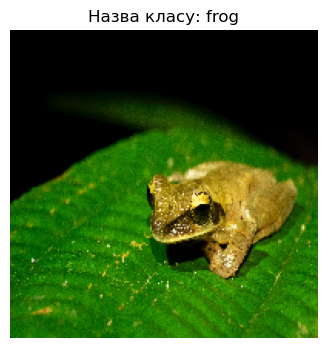

In [19]:
img_path = askopenfilename()

img = image.load_img(img_path, target_size=(img_width, img_height))

x = image.img_to_array(img)
x = x.reshape(-1, img_width, img_height, 3)

prediction = model.predict(x)
prediction = np.argmax(prediction)

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Назва класу: {classes[prediction]}" )
plt.axis("off")